## `Installing libraries`

In [ ]:
!pip install clodsa

## `Importing Libraries`


In [ ]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2
%matplotlib inline

## `Connecting Google Drive`

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#Creating Dataset Folder
import os
os.makedirs('dataset/camera_micrography')

#Copy
!cp '/content/drive/My Drive/Colab Notebooks/camera_micrography.zip' dataset/camera_micrography.zip

## `Unzip Dataset`



In [ ]:
!unzip dataset/camera_micrography.zip -d dataset/camera_micrography

## `Creating augmentor object`

In [ ]:
INPUT_PATH = 'dataset/camera_micrography'
PROBLEM = "detection"
ANNOTATION_MODE = "yolo"
GENERATION_MODE = "linear"
OUTPUT_MODE = "yolo"
OUTPUT_PATH= "augmented_images_yolo"
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})


## `Converting BGR to RGB`

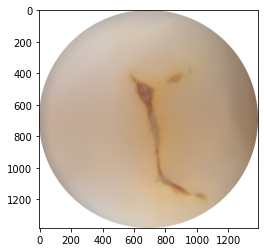

In [ ]:
img = cv2.imread("dataset/camera_micrography/camera_micrography/200.jpg")
# changing to the BGR format of OpenCV to RGB format for matplotlib
img_rgb = img[:, :, ::-1]
plt.imshow(img_rgb)

## `Function to read the annotions`

In [ ]:
def boxesFromYOLO(imagePath,labelPath):
    image = cv2.imread(imagePath)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(labelPath)]
    #if(len(objects)<1):
    #    raise Exception("The xml should contain at least one object")
    boxes = []
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            category = components[0]
            x  = int(float(components[1])*wI - float(components[3])*wI/2)
            y = int(float(components[2])*hI - float(components[4])*hI/2)
            h = int(float(components[4])*hI)
            w = int(float(components[3])*wI)
            boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [ ]:
categoriesColors = {11: (255,0,0),14:(0,0,255)}

def showBoxes(image,boxes):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        if int(category) in categoriesColors.keys():
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),categoriesColors[int(category)],5)
        else:
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(0,255,0),5)
    plt.imshow(cloneImg[:,:,::-1])
    

## `To show the annotation of the image`

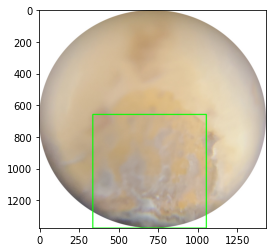

In [ ]:
img,boxes = boxesFromYOLO("dataset/camera_micrography/camera_micrography/1.jpg","dataset/camera_micrography/camera_micrography/1.txt")
showBoxes(img,boxes)

## `Defining transformer generator`

In [ ]:
transformer = transformerGenerator(PROBLEM)

## `Vertical Flip`

In [ ]:
vFlip = createTechnique("flip",{"flip":0})
augmentor.addTransformer(transformer(vFlip))

## `Showing the result of applying the transformation`

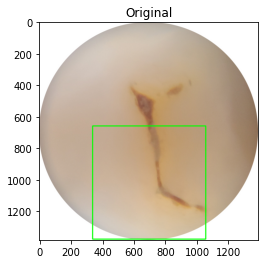

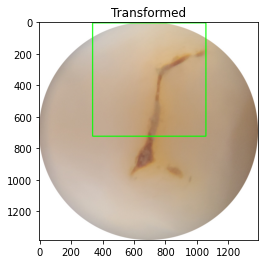

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
vFlipGenerator = transformer(vFlip)
vFlipImg,vFlipBoxes = vFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(vFlipImg,vFlipBoxes)

## `Horizontal Flip`

In [ ]:
hFlip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(hFlip))

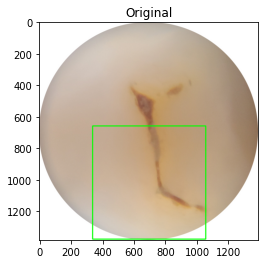

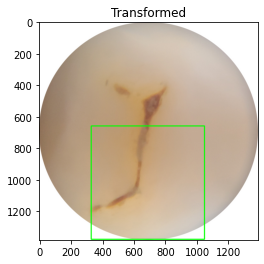

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hFlipGenerator = transformer(hFlip)
hFlipImg,hFlipBoxes = hFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hFlipImg,hFlipBoxes)

## `Horizontal & Vertical Flip`

In [ ]:
hvFlip = createTechnique("flip",{"flip":-1})
augmentor.addTransformer(transformer(hvFlip))

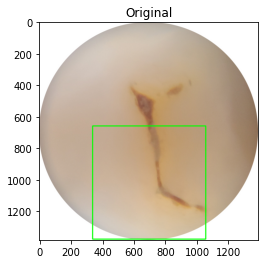

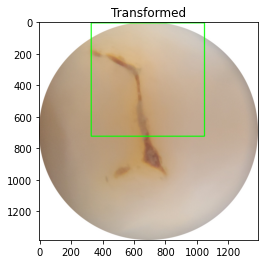

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hvFlipGenerator = transformer(hvFlip)
hvFlipImg,hvFlipBoxes = hvFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hvFlipImg,hvFlipBoxes)

## `Rotation`

In [ ]:
rotate = createTechnique("rotate", {"angle" : 90})
augmentor.addTransformer(transformer(rotate))

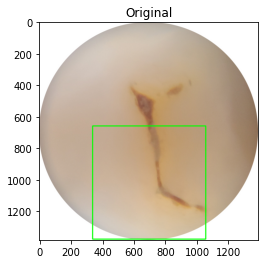

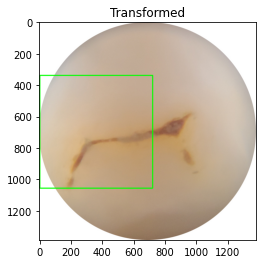

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = transformer(rotate)
rotateImg,rotateBoxes = rotateGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(rotateImg,rotateBoxes)

## `Average blurring`

In [ ]:
avgBlur =  createTechnique("average_blurring", {"kernel" : 5})
augmentor.addTransformer(transformer(avgBlur))

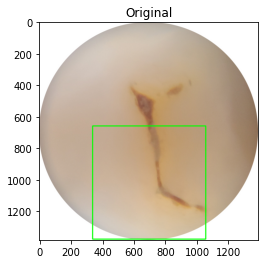

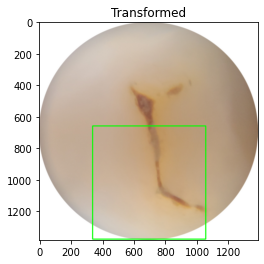

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
avgBlurGenerator = transformer(avgBlur)
avgBlurImg,avgBlurBoxes = avgBlurGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(avgBlurImg,avgBlurBoxes)

## `Raise Hue (Increase Color)`

In [ ]:
hue = createTechnique("raise_hue", {"power" : 0.9})
augmentor.addTransformer(transformer(hue))

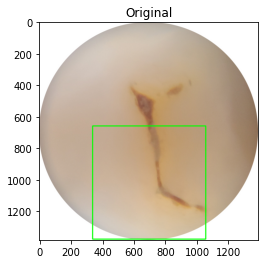

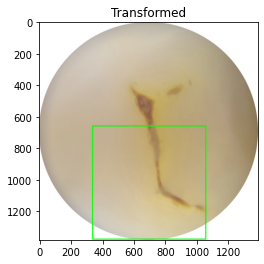

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = transformer(hue)
hueImg,hueBoxes = hueGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hueImg,hueBoxes)

## `None (to keep the original image)`

In [ ]:
none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))

## `Applying the augmentation process`

In [ ]:
augmentor.applyAugmentation()

## `Amount of images in output folder`

In [ ]:
print("Number of images in the folder")
!ls -1 augmented_images_yolo/*.jpg | wc -l
print("Number of annotations in the folder")
!ls -1 augmented_images_yolo/*.txt | wc -l

Number of images in the folder
1631
Number of annotations in the folder
1631


## `To download generated files`

In [ ]:
!zip -r augmented_images_yolo.zip augmented_images_yolo
from google.colab import files
files.download('augmented_images_yolo.zip')